## Using Python as Excel

### Description
In this file, I will like to introduce basic features you can do using Excel in Python. Excel is a very handy tool, but I believe Python is more flexible and capable of doing more. The following will be the Excel tools that will be expressed in Python.

#### Excel tools
- Four arithmetic operations (+,-,×,÷)
- Functions (SUM, IF, COUNTIF, AVERAGE)
- Adavanced Functions (VLOOKUP)
- Export Files
- Pivot Table
- Tables by categories
- Graphs
- Appliable Software

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('product_data.csv')
df

,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo,country
0,101.0,1.0,1.0,122.0,110.0,2.99,2.99,0,1,USA
1,101.0,1.0,2.0,160.0,79.0,2.49,3.19,0,0,USA
2,101.0,1.0,3.0,169.0,80.0,2.19,2.99,0,0,USA
3,101.0,1.0,4.0,119.0,102.0,2.49,2.49,0,0,USA
4,101.0,1.0,5.0,114.0,143.0,2.49,2.59,0,1,USA
...,...,...,...,...,...,...,...,...,...,...
2075,120.0,2.0,48.0,135.0,84.0,2.79,3.19,0,0,CHN
2076,120.0,2.0,49.0,102.0,95.0,2.79,2.59,0,0,CHN
2077,120.0,2.0,50.0,112.0,81.0,2.79,2.99,0,0,CHN
2078,120.0,2.0,51.0,118.0,117.0,2.99,2.99,0,0,CHN


### Four arithmetic operations (+,-,×,÷)

In [11]:
## sales_total: adding the numbers in the p1_sales to p2_sales
df['sales_total'] = df['p1_sales'] + df['p2_sales']
df.head(4)

,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo,country,sales_total
0,101.0,1.0,1.0,122.0,110.0,2.99,2.99,0,1,USA,232.0
1,101.0,1.0,2.0,160.0,79.0,2.49,3.19,0,0,USA,239.0
2,101.0,1.0,3.0,169.0,80.0,2.19,2.99,0,0,USA,249.0
3,101.0,1.0,4.0,119.0,102.0,2.49,2.49,0,0,USA,221.0


In [12]:
## price_diff: subtracing the numbers in the p2_price to p1_price
df['price_diff'] = df['p2_price'] - df['p1_price']
df.head(4)

,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo,country,sales_total,price_diff
0,101.0,1.0,1.0,122.0,110.0,2.99,2.99,0,1,USA,232.0,0.0
1,101.0,1.0,2.0,160.0,79.0,2.49,3.19,0,0,USA,239.0,0.7
2,101.0,1.0,3.0,169.0,80.0,2.19,2.99,0,0,USA,249.0,0.8
3,101.0,1.0,4.0,119.0,102.0,2.49,2.49,0,0,USA,221.0,0.0


In [13]:
## both_promo: multipling the numbers in the p1_promo to p2_promo
df['both_promo'] = df['p1_promo'] * df['p2_promo']
df.head(4)

,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo,country,sales_total,price_diff,both_promo
0,101.0,1.0,1.0,122.0,110.0,2.99,2.99,0,1,USA,232.0,0.0,0
1,101.0,1.0,2.0,160.0,79.0,2.49,3.19,0,0,USA,239.0,0.7,0
2,101.0,1.0,3.0,169.0,80.0,2.19,2.99,0,0,USA,249.0,0.8,0
3,101.0,1.0,4.0,119.0,102.0,2.49,2.49,0,0,USA,221.0,0.0,0


In [14]:
## p1_unit: dividing the numbers in the p1_sales to p1_price
df['p1_unit'] = round(df['p1_sales'] / df['p1_price'],2)

## p2_unit: dividing the numbers in the p2_sales to p2_price
df['p2_unit'] = round(df['p2_sales'] / df['p2_price'],2)
df.head(4)

,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo,country,sales_total,price_diff,both_promo,p1_unit,p2_unit
0,101.0,1.0,1.0,122.0,110.0,2.99,2.99,0,1,USA,232.0,0.0,0,40.80,36.79
1,101.0,1.0,2.0,160.0,79.0,2.49,3.19,0,0,USA,239.0,0.7,0,64.26,24.76
2,101.0,1.0,3.0,169.0,80.0,2.19,2.99,0,0,USA,249.0,0.8,0,77.17,26.76
3,101.0,1.0,4.0,119.0,102.0,2.49,2.49,0,0,USA,221.0,0.0,0,47.79,40.96


### Functions (SUM, IF, COUNTIF, AVERAGE, STD)

In [15]:
#### For the following functions, make a seperate dataframe
## SUM: sum of p1_sales, p2_sales, p1_promo, p2_promo
SUM =  pd.DataFrame()
SUM = SUM.append({
    'Total_p1_sales': df['p1_sales'].sum(),
    'Total_p2_sales': df['p2_sales'].sum(),
    'Total_p1_promo': df['p1_promo'].sum(),
    'Total_p2_promo': df['p2_promo'].sum(),
    },ignore_index=True)
SUM

,Total_p1_sales,Total_p2_sales,Total_p1_promo,Total_p2_promo
0,278653.0,207815.0,209.0,303.0


In [36]:
## COUNTIF: if p1_price > 2.50 and p2_price > 3.10
CF = pd.DataFrame()
CF = CF.append({
    'CNT': len(df[(df['p1_price'] > 2.50)&(df['p2_price'] > 3.10)])
},ignore_index=True)
CF

,CNT
0,174.0


In [17]:
## AVERAGE: average of sales, price, promo
AVG =  pd.DataFrame()
AVG = AVG.append({
    'Average_p1_sales': df['p1_sales'].mean(),
    'Average_p2_sales': df['p2_sales'].mean(),
    'Average_p1_price': df['p1_price'].mean(),
    'Average_p2_price': df['p2_price'].mean(),
    'Average_p1_promo': df['p1_promo'].mean(),
    'Average_p2_promo': df['p2_promo'].mean(),
    },ignore_index=True)
AVG

,Average_p1_sales,Average_p2_sales,Average_p1_price,Average_p2_price,Average_p1_promo,Average_p2_promo
0,133.967788,99.911058,2.548654,2.716106,0.100481,0.145673


In [18]:
## Standard deviation: std of sales, price, promo
STD =  pd.DataFrame()
STD = STD.append({
    'Std_p1_sales': df['p1_sales'].std(),
    'Std_p2_sales': df['p2_sales'].std(),
    'Std_p1_price': df['p1_price'].std(),
    'Std_p2_price': df['p2_price'].std(),
    'Std_p1_promo': df['p1_promo'].std(),
    'Std_p2_promo': df['p2_promo'].std(),
    },ignore_index=True)
STD

,Std_p1_sales,Std_p2_sales,Std_p1_price,Std_p2_price,Std_p1_promo,Std_p2_promo
0,29.355076,24.453788,0.300716,0.333559,0.300712,0.352863


### Adavanced Functions (VLOOKUP)

### Export Files

In [19]:
## Export the "Four arithmetic operations" columns
ex1 = df[['store_num', 'year', 'week', 'country', 'sales_total',
       'price_diff', 'both_promo', 'p1_unit', 'p2_unit']]
ex1.head(3)

,store_num,year,week,country,sales_total,price_diff,both_promo,p1_unit,p2_unit
0,101.0,1.0,1.0,USA,232.0,0.0,0,40.80,36.79
1,101.0,1.0,2.0,USA,239.0,0.7,0,64.26,24.76
2,101.0,1.0,3.0,USA,249.0,0.8,0,77.17,26.76


In [20]:
ex1.to_excel('Four_arithmetic_operations.xlsx')

### Pivot Table

In [22]:
## Make Pivot table by country, dividing it by week, value: sales
pd.pivot_table(df, values='p1_sales',index = 'country', columns= 'week')

week,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0
country,,,,,,,,,,,,,,,,,,,,,
AUS,143.00,130.500000,112.000000,143.000000,135.500000,163.500000,151.500000,151.000000,129.000000,120.000000,...,134.000000,126.500000,125.000000,121.500000,164.000000,129.000000,135.00,122.000000,126.500000,138.000000
BRA,141.75,131.500000,135.500000,135.750000,128.000000,118.750000,132.000000,168.250000,133.500000,148.750000,...,142.000000,114.500000,157.000000,137.250000,124.250000,121.000000,122.25,129.250000,104.250000,147.000000
CHN,126.25,150.750000,118.500000,161.000000,139.750000,145.500000,129.000000,134.500000,129.000000,137.750000,...,124.750000,143.500000,143.000000,132.000000,137.750000,135.250000,134.50,108.750000,120.500000,125.500000
DEU,141.30,118.000000,136.400000,150.800000,130.000000,130.100000,137.700000,140.500000,139.000000,145.300000,...,139.200000,143.300000,118.900000,141.200000,130.900000,134.700000,128.70,125.700000,127.000000,160.300000
GBR,155.00,141.666667,142.166667,123.000000,132.333333,126.166667,117.333333,122.333333,156.666667,140.833333,...,132.833333,128.166667,125.333333,124.333333,161.166667,133.500000,144.00,125.833333,122.333333,136.333333
JPN,134.75,140.875000,145.000000,132.125000,143.875000,133.625000,129.375000,125.875000,123.500000,126.000000,...,129.625000,138.875000,142.000000,137.500000,132.625000,152.875000,136.75,121.250000,130.000000,136.125000
USA,124.50,144.000000,144.500000,130.166667,131.833333,150.166667,143.500000,125.166667,119.000000,136.000000,...,114.166667,136.833333,150.833333,145.166667,119.833333,128.333333,129.50,138.333333,137.666667,135.666667


In [23]:
## Make Pivot table by country, dividing it by year, value: sales
pd.pivot_table(df, values='p1_sales',index = 'country', columns= 'year')

year,1.0,2.0
country,,
AUS,129.519231,139.326923
BRA,132.942308,134.913462
CHN,136.576923,129.211538
DEU,135.030769,135.442308
GBR,132.660256,136.025641
JPN,130.581731,132.961538
USA,134.262821,135.730769


In [24]:
## Make Pivot table by country, dividing it by year, value: sales
pd.pivot_table(df, values='p2_sales',index = 'country', columns= 'year')

year,1.0,2.0
country,,
AUS,105.673077,97.192308
BRA,100.403846,98.913462
CHN,97.769231,102.788462
DEU,101.073077,99.250000
GBR,101.673077,97.237179
JPN,102.312500,99.682692
USA,98.320513,97.512821


In [25]:
## Make Pivot table by store number, dividing it by year, value: sales
pd.pivot_table(df, values='p2_sales',index = 'store_num', columns= 'year')

year,1.0,2.0
store_num,,
101.0,97.269231,100.038462
102.0,96.711538,95.884615
103.0,100.980769,96.615385
104.0,102.596154,100.076923
105.0,101.019231,99.038462
106.0,105.230769,95.384615
107.0,96.634615,102.557692
108.0,99.884615,99.192308
109.0,99.269231,96.250000


### Tables by categories

In [26]:
## Create tables by country, store_num, and year
df.groupby(['store_num', 'year','country']).p1_sales.mean().unstack()

country                AUS         BRA         CHN         DEU         GBR  \
store_num year                                                               
101.0     1.0          NaN         NaN         NaN         NaN         NaN   
          2.0          NaN         NaN         NaN         NaN         NaN   
102.0     1.0          NaN         NaN         NaN         NaN         NaN   
          2.0          NaN         NaN         NaN         NaN         NaN   
103.0     1.0          NaN         NaN         NaN         NaN         NaN   
          2.0          NaN         NaN         NaN         NaN         NaN   
104.0     1.0          NaN         NaN         NaN  127.653846         NaN   
          2.0          NaN         NaN         NaN  135.942308         NaN   
105.0     1.0          NaN         NaN         NaN  136.000000         NaN   
          2.0          NaN         NaN         NaN  134.961538         NaN   
106.0     1.0          NaN         NaN         NaN  135.653846         NaN   
          2.0          NaN         NaN         NaN  136.461538         NaN   
107.0     1.0          NaN         NaN         NaN  139.615385         NaN   
          2.0          NaN         NaN         NaN  138.346154         NaN   
108.0     1.0          NaN         NaN         NaN  136.230769         NaN   
          2.0          NaN         NaN         NaN  131.500000         NaN   
109.0     1.0          NaN         NaN         NaN         NaN  130.557692   
          2.0          NaN         NaN         NaN         NaN  137.634615   
110.0     1.0          NaN         NaN         NaN         NaN  130.961538   
          2.0          NaN         NaN         NaN         NaN  138.346154   
111.0     1.0          NaN         NaN         NaN         NaN  136.461538   
          2.0          NaN         NaN         NaN         NaN  132.096154   
112.0     1.0          NaN  130.500000         NaN         NaN         NaN   
          2.0          NaN  135.500000         NaN         NaN         NaN   
113.0     1.0          NaN  135.384615         NaN         NaN         NaN   
          2.0          NaN  134.326923         NaN         NaN         NaN   
114.0     1.0          NaN         NaN         NaN         NaN         NaN   
          2.0          NaN         NaN         NaN         NaN         NaN   
115.0     1.0          NaN         NaN         NaN         NaN         NaN   
          2.0          NaN         NaN         NaN         NaN         NaN   
116.0     1.0          NaN         NaN         NaN         NaN         NaN   
          2.0          NaN         NaN         NaN         NaN         NaN   
117.0     1.0          NaN         NaN         NaN         NaN         NaN   
          2.0          NaN         NaN         NaN         NaN         NaN   
118.0     1.0   129.519231         NaN         NaN         NaN         NaN   
          2.0   139.326923         NaN         NaN         NaN         NaN   
119.0     1.0          NaN         NaN  137.134615         NaN         NaN   
          2.0          NaN         NaN  127.538462         NaN         NaN   
120.0     1.0          NaN         NaN  136.019231         NaN         NaN   
          2.0          NaN         NaN  130.884615         NaN         NaN   

country                JPN         USA  
store_num year                          
101.0     1.0          NaN  132.538462  
          2.0          NaN  134.461538  
102.0     1.0          NaN  139.692308  
          2.0          NaN  137.923077  
103.0     1.0          NaN  130.557692  
          2.0          NaN  134.807692  
104.0     1.0          NaN         NaN  
          2.0          NaN         NaN  
105.0     1.0          NaN         NaN  
          2.0          NaN         NaN  
106.0     1.0          NaN         NaN  
          2.0          NaN         NaN  
107.0     1.0          NaN         NaN  
          2.0          NaN         NaN  
108.0     1.0          NaN         NaN  
          2.0          NaN

### Graphs

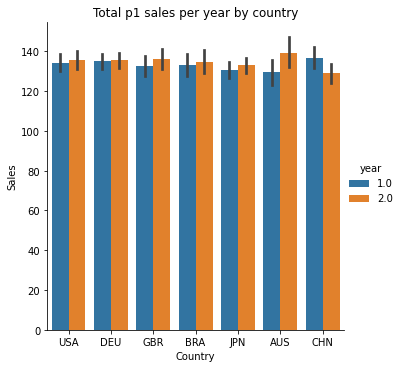

In [39]:
## bar graph
# total p1 sales per year by country
sns.catplot(
    x='country',
    y='p1_sales',
    data=df,
    hue='year',
    kind='bar'
)
plt.title('Total p1 sales per year by country')
plt.xlabel('Country')
plt.ylabel('P1 Sales')
plt.show()

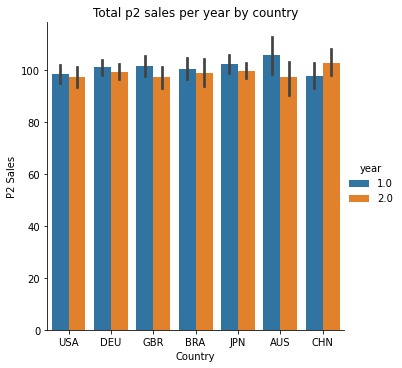

In [40]:
# total p2 sales per year by country
sns.catplot(
    x='country',
    y='p2_sales',
    data=df,
    hue='year',
    kind='bar'
)
plt.title('Total p2 sales per year by country')
plt.xlabel('Country')
plt.ylabel('P2 Sales')
plt.show()

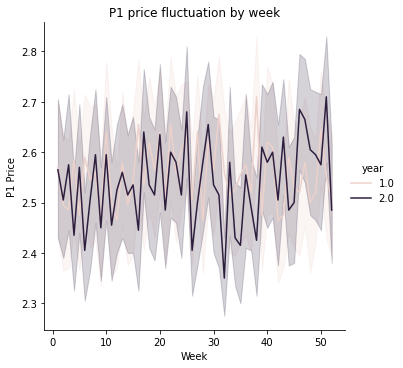

In [42]:
## line graph (time)
# p1 price fluctuation by week
sns.relplot(
    x='week',
    y='p1_price',
    data=df,
    hue='year',
    kind='line'
)
plt.title('P1 price fluctuation by week')
plt.xlabel('Week')
plt.ylabel('P1 Price')
plt.show()

In [30]:
# p1 price fluctuation by week (comparing at first and second half the year)

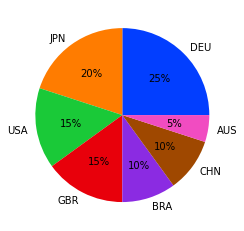

In [46]:
## pie chart
# propotion of stores by country
data = df['country'].value_counts().values
labels = df['country'].value_counts().index
colors = sns.color_palette('bright')[0:7]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

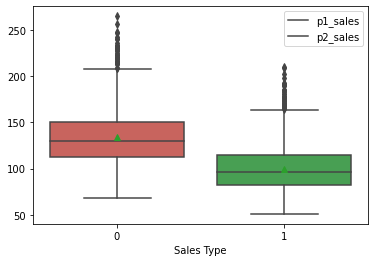

In [53]:
## boxplot (sales,  price)
sns.boxplot(
    data=[df['p1_sales'], df['p2_sales']],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]],
    showmeans=True, 
)
plt.xlabel('Sales Type')
plt.legend(labels = ['p1_sales','p2_sales'])
plt.show()

In [33]:
## mix graph (bar + line)
# (p1) first 15 weeks of price and sales

In [34]:
# (p2) first 15 weeks of price and sales

### Appliable Software

In [54]:
## inputing this file in, output will be the two exported files
def new_excel(input_file,output_file):
    df = pd.read_csv(input_file)
    df['sales_total'] = df['p1_sales'] + df['p2_sales']
    df['price_diff'] = df['p2_price'] - df['p1_price']
    df['both_promo'] = df['p1_promo'] * df['p2_promo']
    df['p1_unit'] = round(df['p1_sales'] / df['p1_price'],2)
    df['p2_unit'] = round(df['p2_sales'] / df['p2_price'],2)
    ex1 = df[['store_num', 'year', 'week', 'country', 'sales_total',
        'price_diff', 'both_promo', 'p1_unit', 'p2_unit']]
    return ex1.to_excel(output_file)